In [109]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:10000]

In [110]:
from sklearn.utils import resample

#Trova la classe target più rappresentata
target_max = df['smoking'].value_counts().idxmax()

#Suddividi il dataset in due parti in base alla classe target
df_magg = df[df['smoking'] == target_max]
df_min = df[df['smoking'] != target_max]

#Riduci il numero di campioni nella classe maggioritaria al numero di campioni nella classe minoritaria
df_magg_downsampled = resample( df_magg,
                                replace=False,  # campioni presi senza sostituzione
                                n_samples=len(df_min),  # numero di campioni uguale alla classe minoritaria
                                random_state=42)  # per riproducibilità

#Unisci i due sottoinsiemi bilanciati
df_filtered = pd.concat([df_magg_downsampled, df_min])

print("\nCounts nel dataset partizionato:\n", df_filtered['smoking'].value_counts())


Counts nel dataset partizionato:
 smoking
0    3616
1    3616
Name: count, dtype: int64


In [111]:
df_filtered = df_filtered.drop(['ID','height(cm)','oral'], axis=1)
df_filtered['tartar'] = df_filtered['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df_filtered['gender'] = df_filtered['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [112]:
variabili_pca = list(df_filtered.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[ 0.65646461, -0.7277086 , -0.92982294, ..., -0.44943218,
         1.82639848,  0.873277  ],
       [-1.52331136, -0.3106889 , -0.92982294, ..., -0.50547494,
         1.82639848,  0.873277  ],
       [-1.52331136,  0.5233505 , -0.53929623, ..., -0.52415586,
        -0.54752564,  0.873277  ],
       ...,
       [ 0.65646461, -1.1447283 , -0.53929623, ..., -0.24394204,
        -0.54752564, -1.14511203],
       [ 0.65646461, -1.561748  ,  2.19439079, ...,  0.12967638,
        -0.54752564, -1.14511203],
       [ 0.65646461,  1.35738989, -0.14876951, ..., -0.26262296,
        -0.54752564,  0.873277  ]])

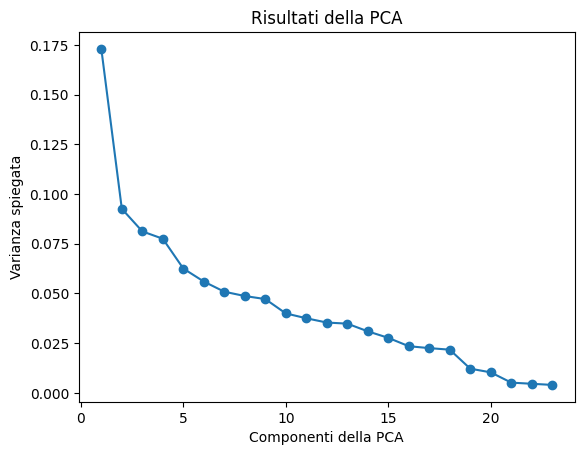

In [114]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [115]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=10).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.17298943 0.09258424 0.08122424 0.07752174 0.06254185 0.05599266
 0.05088769 0.04871564 0.04718104 0.03997828]


In [116]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.7296168176249661


In [117]:
pca_df = pd.DataFrame(abs(pca.components_[:10]), columns=df_filtered.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10'])
pca_df

gender       age  weight(kg)  waist(cm)  eyesight(left)  \
PC1   0.364628  0.117692    0.403997   0.372555        0.074885   
PC2   0.209536  0.422122    0.134547   0.033494        0.288254   
PC3   0.055866  0.099801    0.039821   0.077950        0.058852   
PC4   0.079846  0.150219    0.056981   0.089395        0.078871   
PC5   0.123903  0.086784    0.034692   0.069414        0.075650   
PC6   0.006380  0.057008    0.045269   0.094908        0.460848   
PC7   0.017644  0.142681    0.019650   0.024994        0.224344   
PC8   0.272859  0.061648    0.009321   0.105349        0.279481   
PC9   0.080771  0.101262    0.202536   0.213223        0.084888   
PC10  0.215974  0.009342    0.237916   0.279097        0.011465   

      eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
PC1          0.067448       0.019923        0.021240  0.218020    0.231506   
PC2          0.238976       0.260972        0.233765  0.255202    0.226029   
PC3          0.060819       0.049484        0.023333  0.196245    0.208156   
PC4          0.067608       0.211853        0.255117  0.241585    0.186916   
PC5          0.084512       0.432276        0.450326  0.420244    0.448464   
PC6          0.501589       0.354956        0.357866  0.214630    0.198869   
PC7          0.113725       0.159781        0.151033  0.145299    0.146589   
PC8          0.417233       0.001665        0.000666  0.085015    0.080788   
PC9          0.007112       0.044827        0.008595  0.061444    0.048166   
PC10         0.055422       0.033050        0.064177  0.049793    0.029223   

      ...       HDL       LDL  hemoglobin  Urine protein  serum creatinine  \
PC1   ...  0.239838  0.040936    0.351809       0.037401          0.228925   
PC2   ...  0.033827  0.072485    0.153032       0.074394          0.156546   
PC3   ...  0.016229  0.472293    0.020363       0.012435          0.008609   
PC4   ...  0.141197  0.440448    0.009123       0.023516          0.020338   
PC5   ...  0.266677  0.197549    0.087480       0.028618          0.200850   
PC6   ...  0.240389  0.087022    0.010518       0.047430          0.082904   
PC7   ...  0.128375  0.025975    0.042043       0.267364          0.128678   
PC8   ...  0.266428  0.064116    0.260962       0.111563          0.384780   
PC9   ...  0.219539  0.055425    0.046992       0.625349          0.286859   
PC10  ...  0.239484  0.093526    0.253891       0.628301          0.062266   

           AST       ALT       Gtp  dental caries    tartar  
PC1   0.146793  0.192039  0.212467       0.064139  0.070981  
PC2   0.322568  0.266484  0.220588       0.101615  0.088970  
PC3   0.447519  0.422365  0.146693       0.036565  0.013534  
PC4   0.361572  0.373548  0.111438       0.025147  0.067457  
PC5   0.039935  0.016653  0.102887       0.020400  0.032245  
PC6   0.065855  0.051934  0.038238       0.075615  0.123627  
PC7   0.029942  0.028160  0.068490       0.608020  0.513791  
PC8   0.057765  0.026067  0.083714       0.207474  0.244663  
PC9   0.066124  0.136699  0.276381       0.238351  0.340913  
PC10  0.059446  0.112053  0.374277       0.053703  0.081195  

[10 rows x 23 columns]

In [118]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [119]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.339683 -1.358076  1.286615  0.069352  0.904742 -1.284619 -1.623572   
1    -1.577396 -0.371926  0.307012 -0.560475 -1.374896  0.776624 -1.022620   
2    -2.332632  0.503450 -0.283153 -0.271923 -0.911765  0.028062 -0.378141   
3    -2.092873 -2.755691  0.910763  1.985140  0.218938  1.520314 -0.778315   
4    -3.351400 -0.496589  0.422460  0.537125 -0.312811 -0.039295 -0.367940   
...        ...       ...       ...       ...       ...       ...       ...   
7227  2.042193 -0.839746 -0.744773  0.768553 -0.153157  1.065143  1.010898   
7228  1.522798 -0.753806 -0.927293  0.049601 -0.025710  0.347023  0.024826   
7229  0.260970 -0.942899 -2.246127  2.639829  0.813782  1.496673  1.084006   
7230  1.598889 -1.852992  0.748460 -0.286777 -0.287813  0.760651  0.824604   
7231  0.299310 -0.334497  1.048917 -1.512411  1.306075 -2.060354  0.447058   

           PC8       PC9      PC10  target  
0    -0.016025  0.766145 -0.145332       0  
1     1.094349  2.217396  1.738411       0  
2     0.184927  0.080771  0.560122       1  
3    -0.641101  0.597979 -0.948836       0  
4     0.310691  0.249103 -0.051909       0  
...        ...       ...       ...     ...  
7227  0.115693 -0.967024 -0.321598       0  
7228  0.695982 -0.459046  0.005659       1  
7229 -0.364373 -0.305680 -0.820613       0  
7230  0.215454 -1.781109  0.626871       0  
7231 -0.780028  0.598355 -0.543534       0  

[7232 rows x 11 columns]

In [120]:
from sklearn.model_selection import train_test_split

X = df_pca.drop('target', axis=1)
y = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model, filled=True, ax=ax)
plt.plot()

[]

In [122]:
from sklearn.metrics import confusion_matrix

# predizione del nuovo modello
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

Confusion matrix:
 [[890 527]
 [471 282]]

Accuracy: 0.5400921658986175


In [123]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

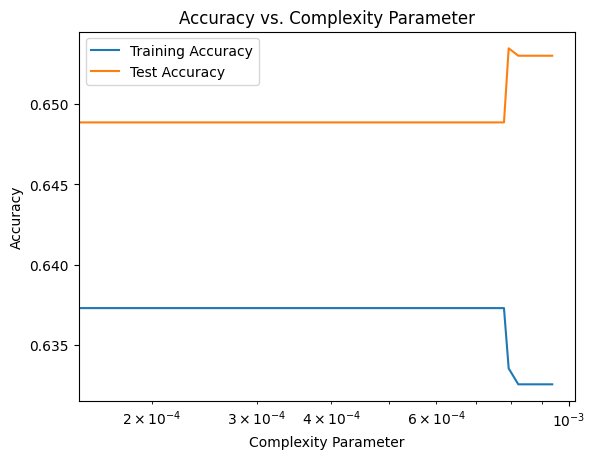

In [124]:
# valori di complessità candidati ad essere tagliati dal modello
# complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

In [125]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.000937772944470974


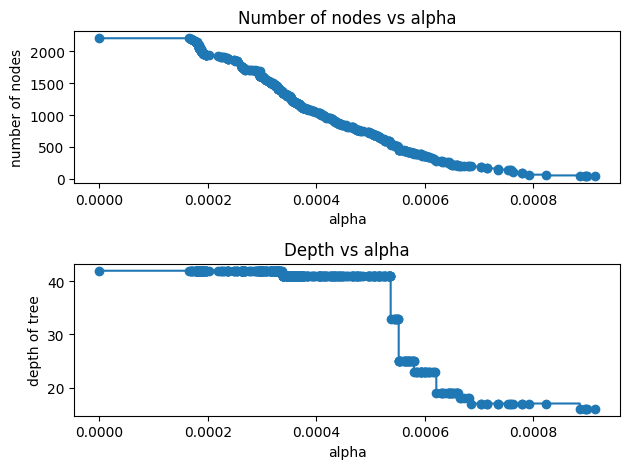

In [126]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [129]:
# Potiamo albero con alpha=0.001
clf_pruned = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.0008)
clf_pruned.fit(X_train, y_train)

accuracy_pruned = clf_pruned.score(X_test, y_test)
print(accuracy_pruned)

0.6534562211981567


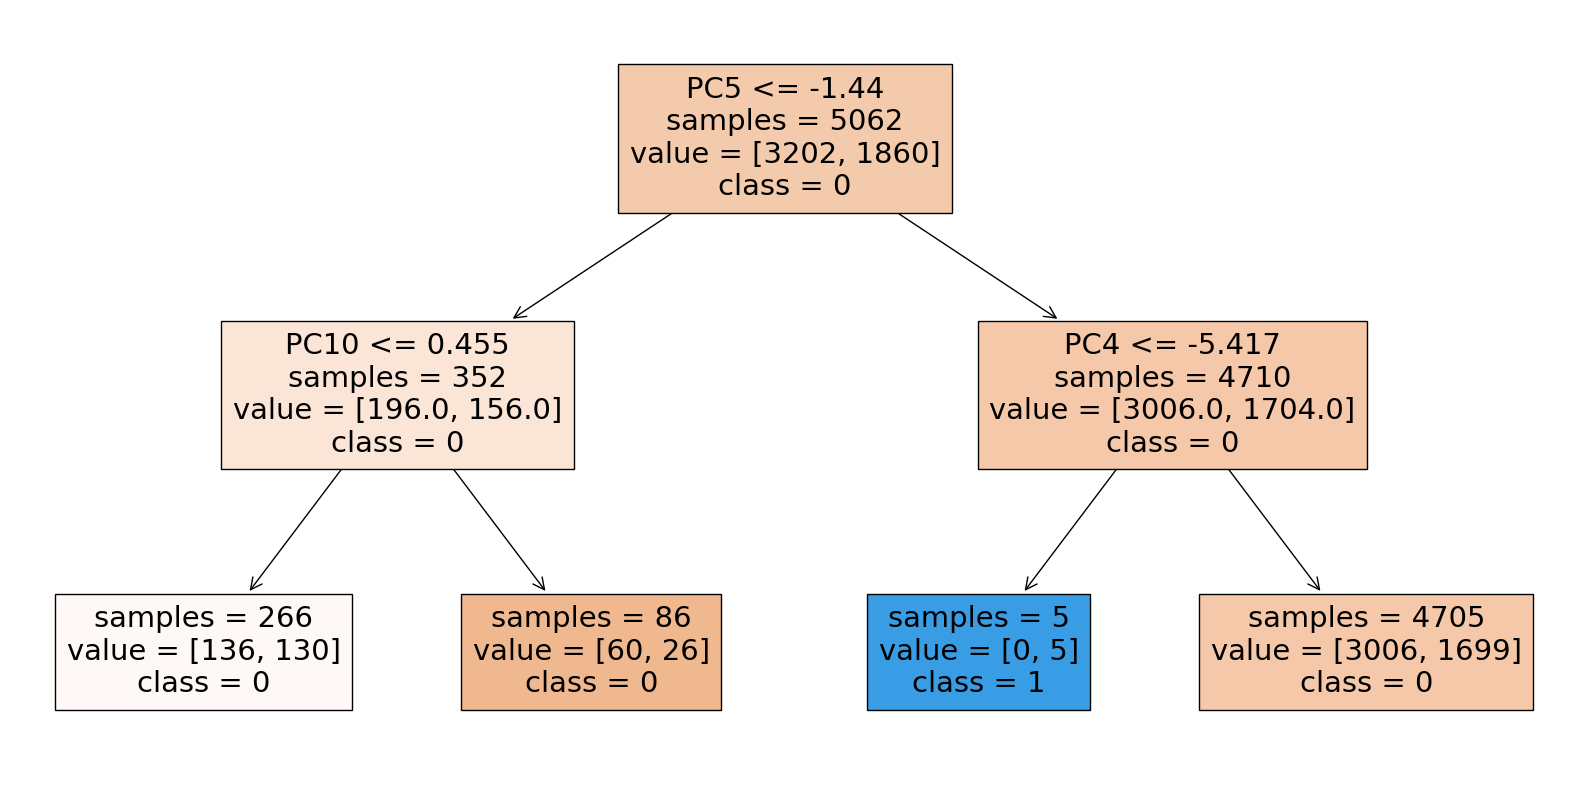

Confusion matrix:
 [[1417    0]
 [ 752    1]]

Accuracy: 0.6534562211981567


In [130]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_pruned,
          feature_names=X_train.columns,
          class_names=[str(x) for x in clf_pruned.classes_],
          filled=True,
          ax=ax,
          impurity=False)

plt.show()
from sklearn.metrics import confusion_matrix

y_pred = clf_pruned.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())